# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Boosting_(Ada_Gradient_XGBoosting)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

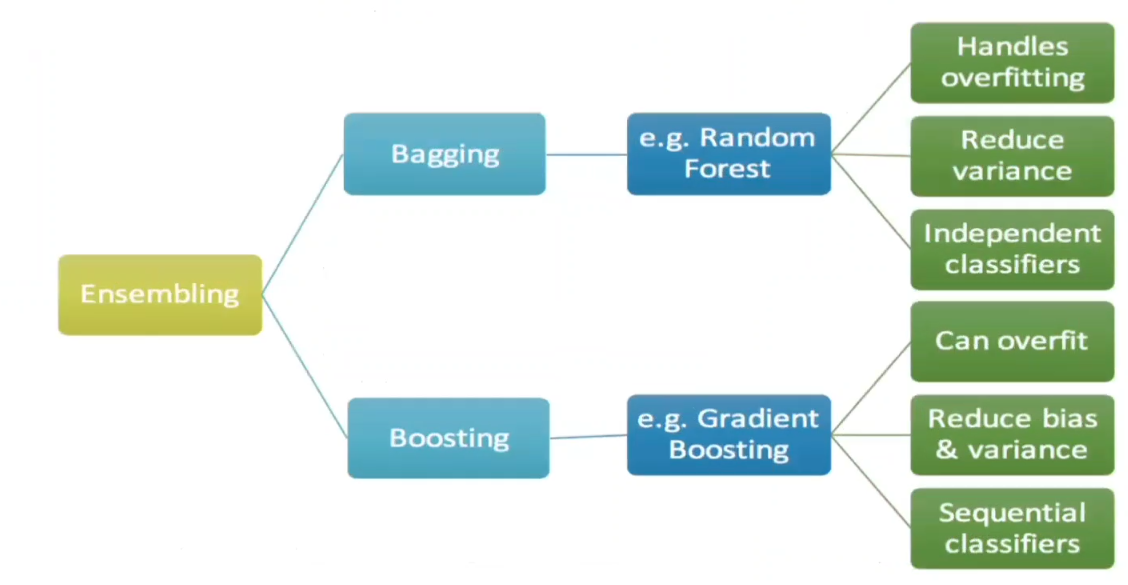

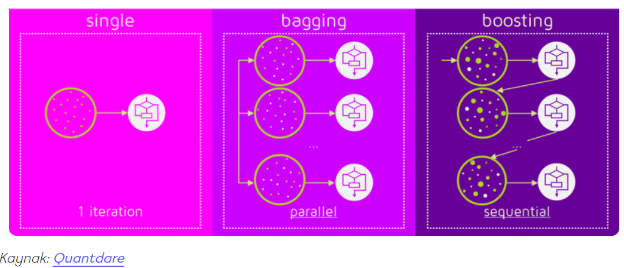

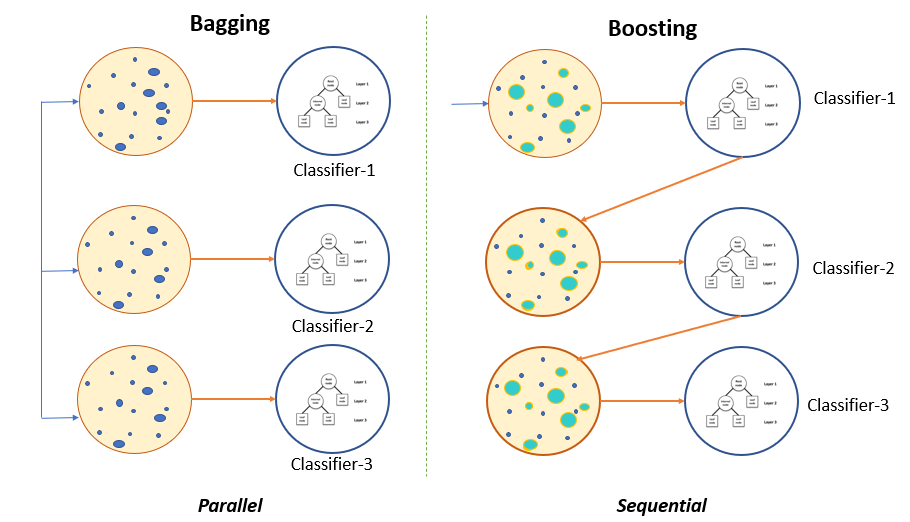

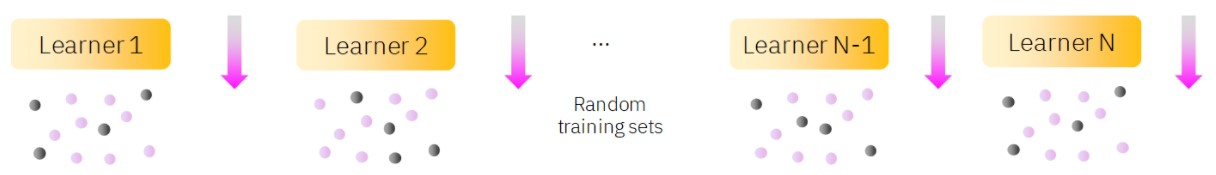
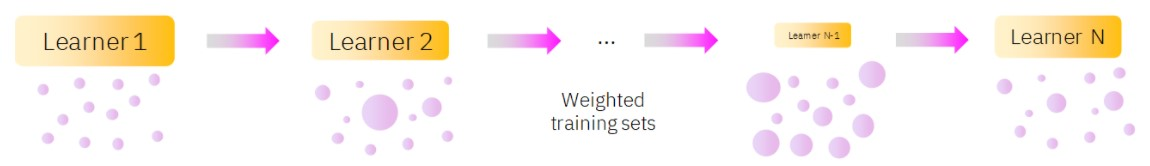

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

## AdaBoost

Ensemble yöntemleri, bir grup temel öğreniciyi bir araya getirerek daha güçlü bir model oluşturan tekniklerdir. Outlier'lar (aykırı değerler), veri setinde genellikle diğer gözlemlerden önemli ölçüde farklı olan nadir veri noktalarını ifade eder. Ensemble yöntemlerinin outlier'lar üzerindeki etkisi, kullanılan öğrenici türüne ve ensemble yönteminin özelliklerine bağlı olarak değişebilir. İşte bazı genel gözlemler:

Rastgele Ormanlar:

Rastgele ormanlar outlier'ları genellikle daha iyi tolere eder. Çünkü her bir ağaç farklı bir alt küme üzerinde eğitildiği için, bir ağacın yanlış bir şekilde outlier'ı etkilemesi diğer ağaçlar üzerinde genellikle zayıf bir etkiye sahip olur.

Boosting Yöntemleri (AdaBoost, Gradient Boosting vb.):

Boosting yöntemleri, önceki öğrenicilerin hatalarını düzeltmeye odaklandığı için, outlier'lar bu yöntemlerde daha fazla etkili olabilir. Özellikle bir önceki öğrenicinin yanlış tahmin ettiği örnekler, bir sonraki öğrenici tarafından daha fazla vurgulanabilir.

Bagging Yöntemleri (Bootstrap Aggregating):

Bagging yöntemleri, öğrenicileri bağımsız olarak eğittiği ve ardından tahminleri birleştirdiği için outlier'ları genellikle daha iyi tolere eder. Ancak, her öğreniciyi benzer şekilde eğitmek, outlier'ların etkisini azaltabilir.

Ensemble Yönteminin Genel Etkisi:

Ensemble yöntemleri, genelde outlier'ların etkisini azaltabilir, çünkü birçok öğreniciyi bir araya getirerek genel bir tahmin yaparlar. Ancak, outlier'lar modelin genel performansını olumsuz yönde etkileyebilir, özellikle veri setinde belirgin bir şekilde yanıltıcı ya da hatalıysa.
Outlier'ların etkisi genellikle veri seti özelliklerine ve kullanılan ensemble yönteminin özelliklerine bağlı olarak değişir. Bu nedenle, öğrenme sürecinde ve modelin performansını değerlendirirken outlier'ları dikkate almak önemlidir.

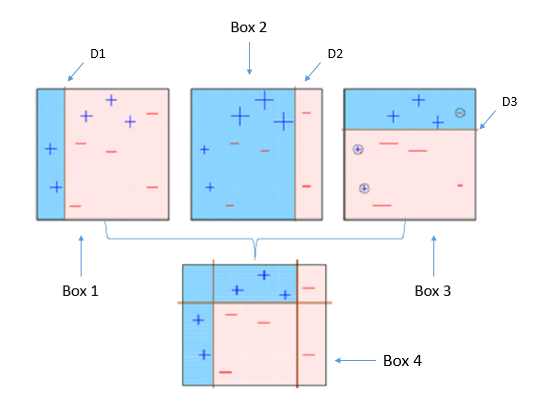

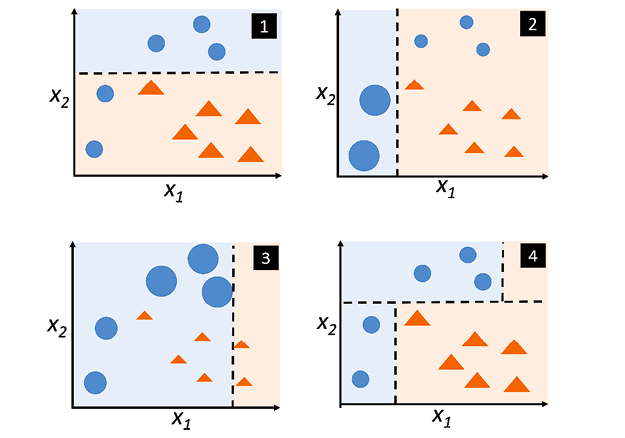

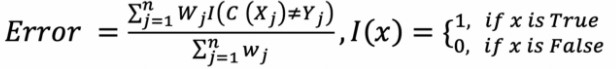
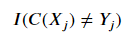

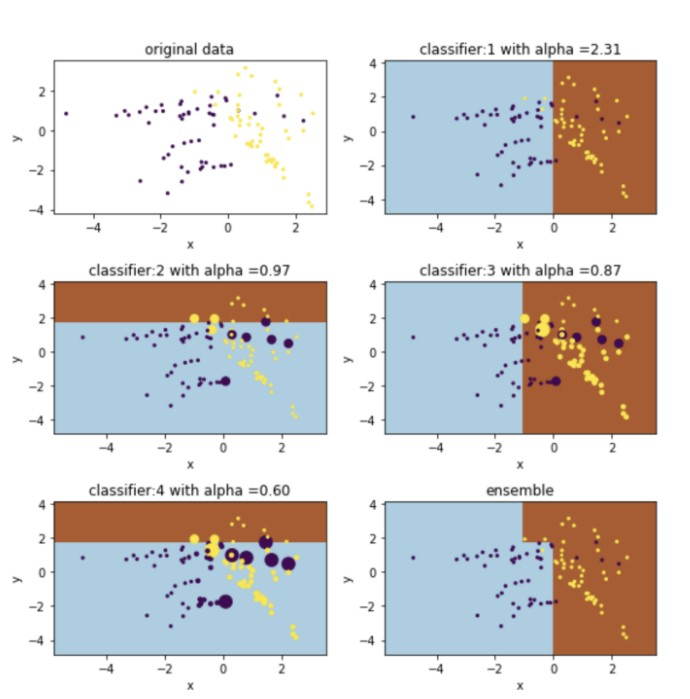

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Read Data Set

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
df = pd.read_csv("advertising2.csv")
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe().T

count         mean           std       min  \
Daily Time Spent on Site  1000.0     65.00020     15.853615     32.60   
Age                       1000.0     36.00900      8.785562     19.00   
Area Income               1000.0  55000.00008  13414.634022  13996.50   
Daily Internet Usage      1000.0    180.00010     43.902339    104.78   
Male                      1000.0      0.48100      0.499889      0.00   
Clicked on Ad             1000.0      0.50000      0.500250      0.00   

                                 25%        50%         75%       max  
Daily Time Spent on Site     51.3600     68.215     78.5475     91.43  
Age                          29.0000     35.000     42.0000     61.00  
Area Income               47031.8025  57012.300  65470.6350  79484.80  
Daily Internet Usage        138.8300    183.130    218.7925    269.96  
Male                          0.0000      0.000      1.0000      1.00  
Clicked on Ad                 0.0000      0.500      1.0000      1.00

In [5]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

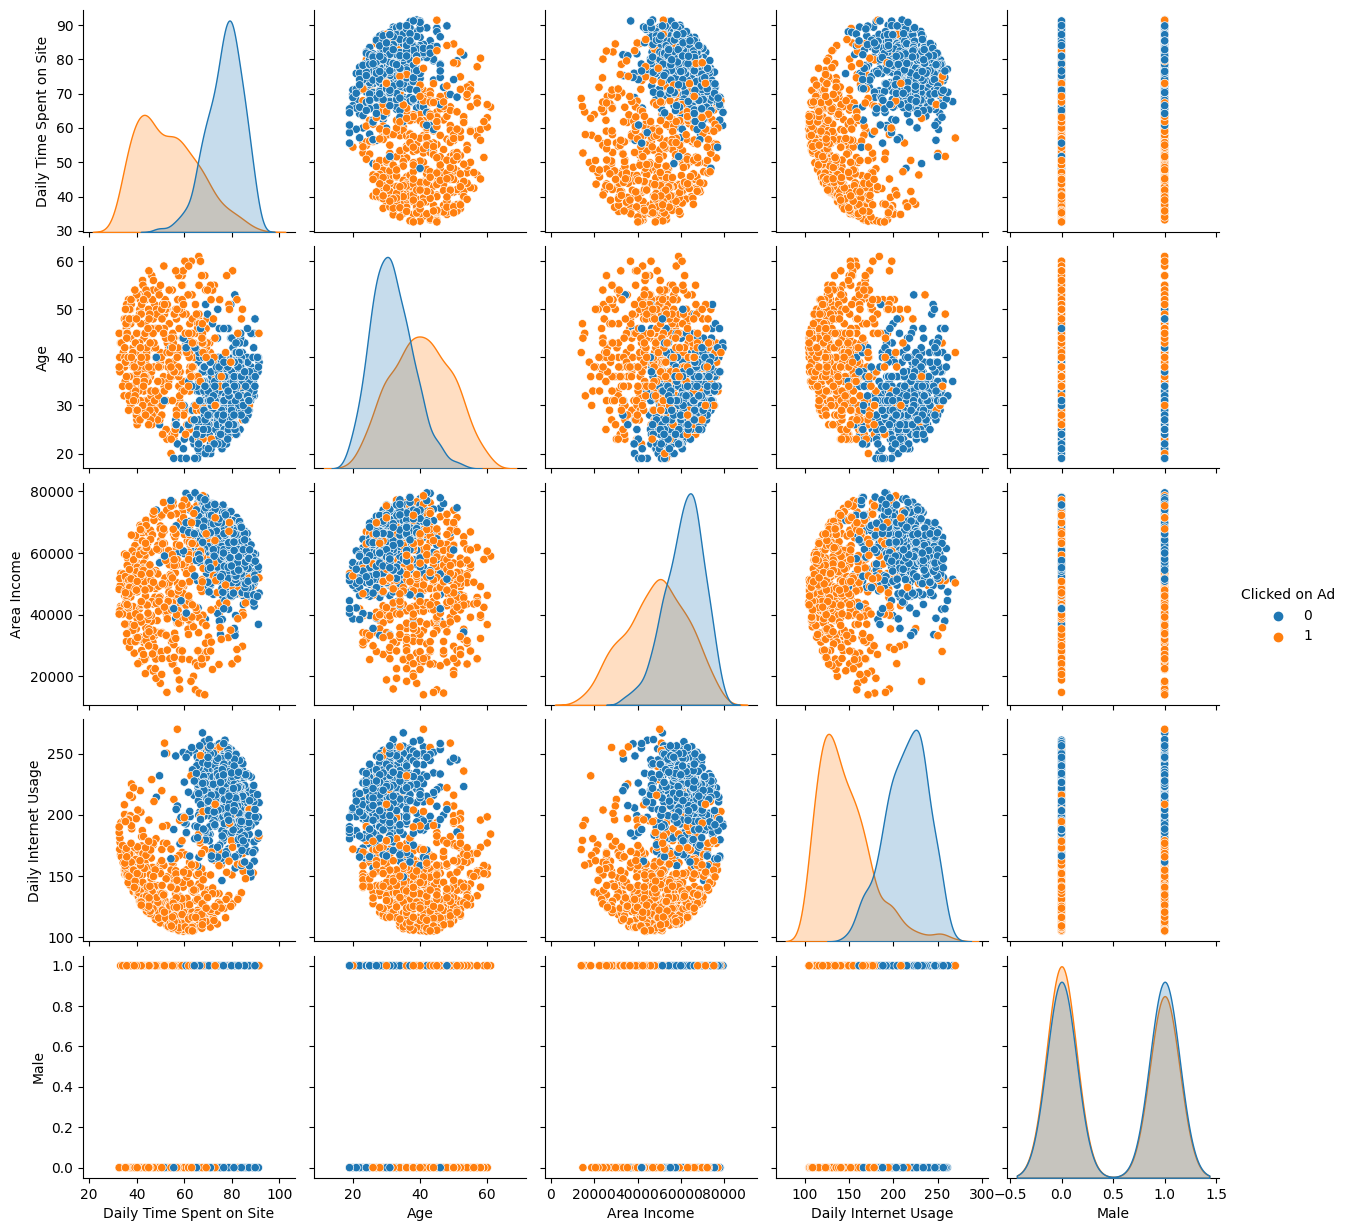

In [6]:
sns.pairplot(df,hue="Clicked on Ad");

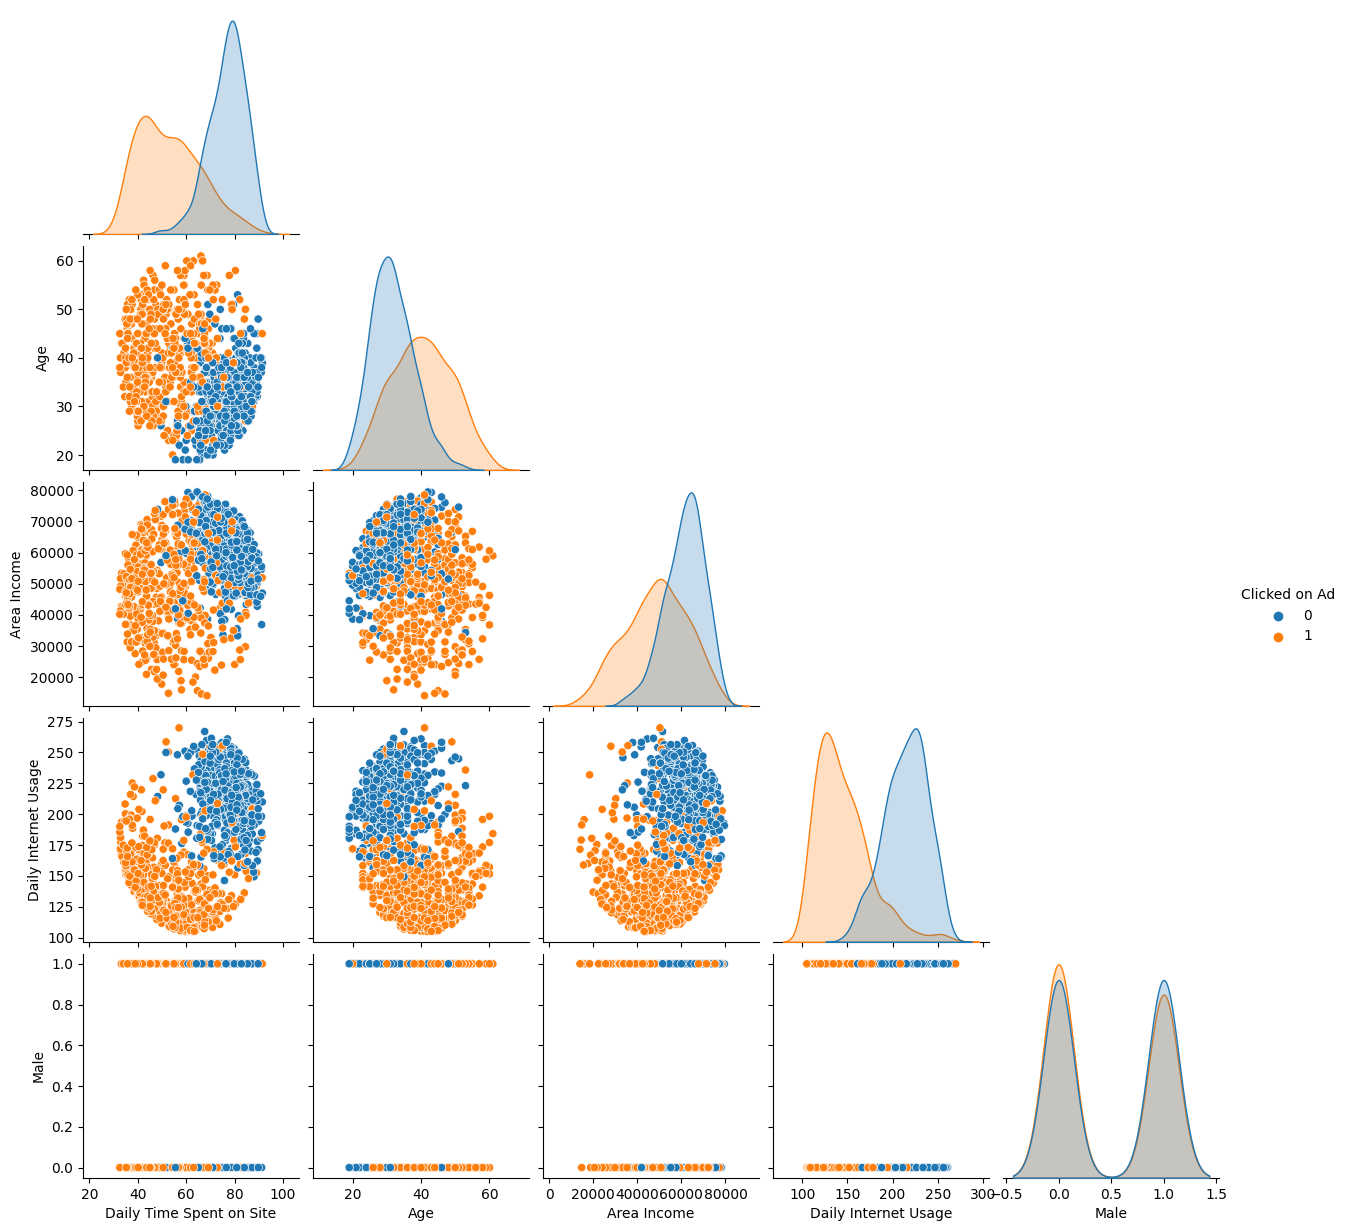

In [7]:
sns.pairplot(df,hue="Clicked on Ad", corner=True);

In [8]:
df.shape

(1000, 10)

## Train | Test Split

In [9]:
df.head(2)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   

                        Ad Topic Line         City  Male  Country  \
0  Cloned 5thgeneration orchestration  Wrightburgh     0  Tunisia   
1  Monitored national standardization    West Jodi     1    Nauru   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [14]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [15]:
from sklearn.tree import DecisionTreeClassifier

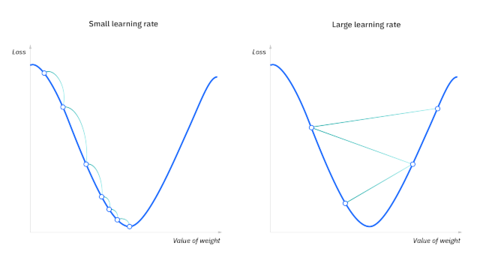

In [16]:
ada_model= AdaBoostClassifier(n_estimators= 50, random_state=42) #DecisionTreeClassifier(max_depth=1)

In [17]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [18]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

In [20]:
from sklearn.tree import plot_tree

In [21]:
model = AdaBoostClassifier(n_estimators= 100, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

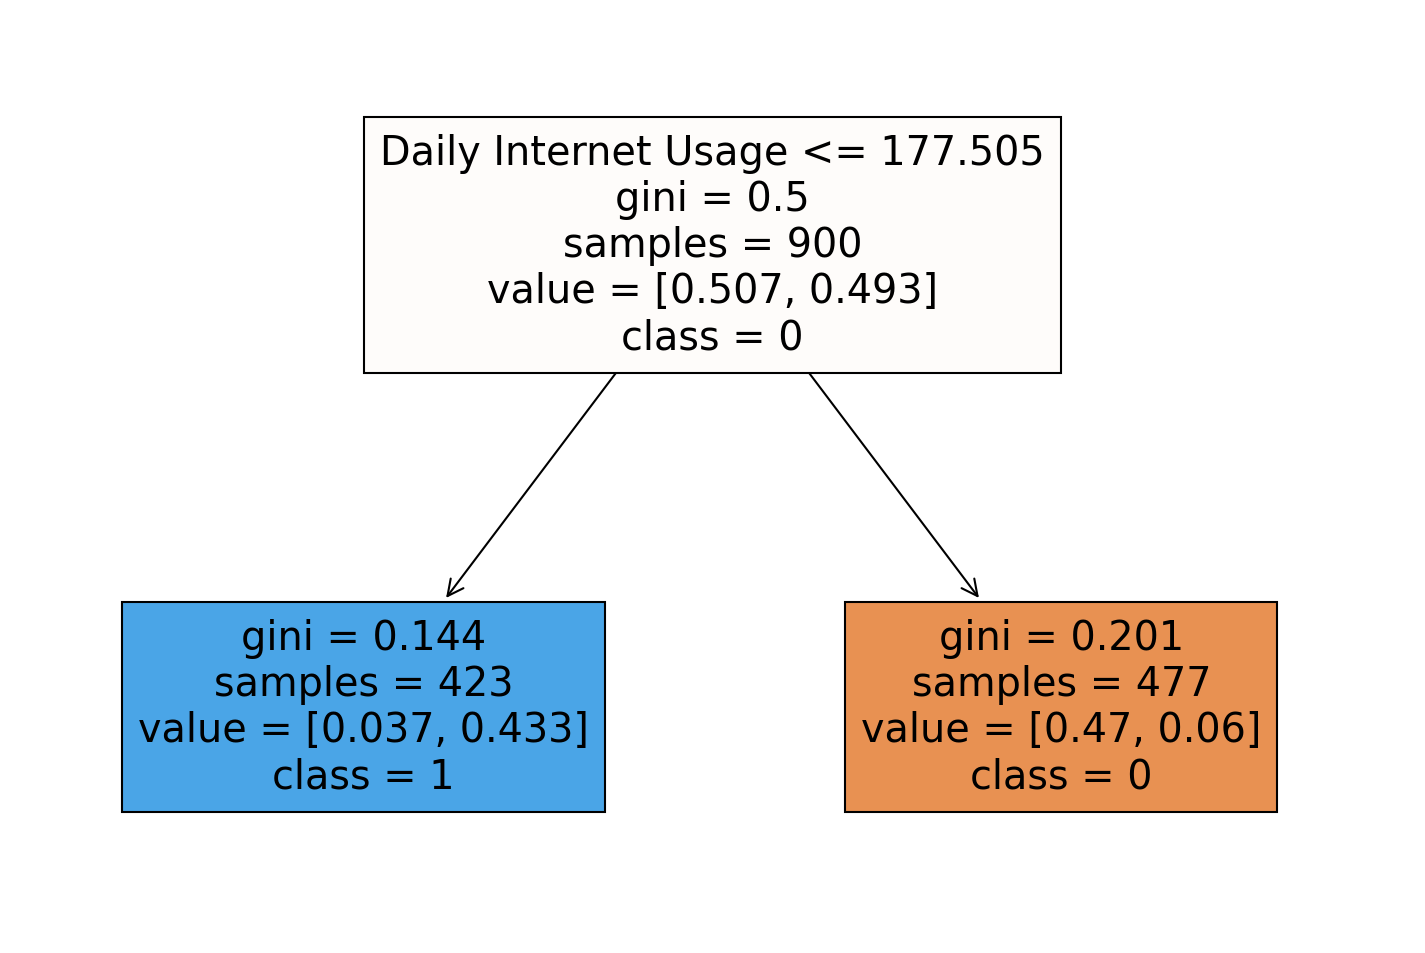

In [22]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique())#proportion=True (oran için)
plt.show();

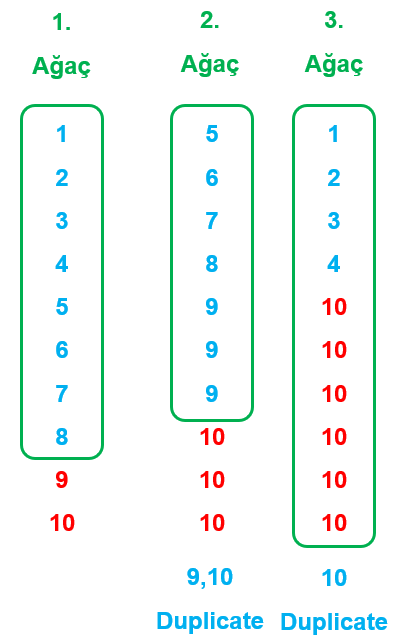

In [23]:
model.estimator_errors_

array([0.09666667, 0.15660636, 0.29526371, 0.28593614, 0.35590938,
       0.39210515, 0.36269642, 0.36981063, 0.38415067, 0.35773598,
       0.3516825 , 0.37454891, 0.42018968, 0.42873964, 0.39973475,
       0.43748548, 0.40219137, 0.45770547, 0.46274743, 0.40702713,
       0.42891649, 0.43044307, 0.36904407, 0.42357491, 0.44299881,
       0.38996104, 0.40345756, 0.41149436, 0.43690794, 0.42621951,
       0.47745572, 0.47172434, 0.46458273, 0.42113437, 0.44541302,
       0.4184376 , 0.42957773, 0.4504647 , 0.45939104, 0.42479237,
       0.42440331, 0.42555073, 0.48041565, 0.46741902, 0.43362918,
       0.427282  , 0.39972274, 0.41673326, 0.45575418, 0.44847986,
       0.44505667, 0.44743232, 0.47679229, 0.42230655, 0.42835275,
       0.45667562, 0.42996773, 0.45612566, 0.47172093, 0.42636411,
       0.45608626, 0.47662667, 0.43966022, 0.48029525, 0.47500795,
       0.42976267, 0.41443837, 0.43214775, 0.41945002, 0.42635949,
       0.4502943 , 0.43778669, 0.42903478, 0.46878745, 0.43040

In [24]:
1/2*np.log((1-0.09666667)/0.09666667) # 1.agac(weak lerner) in sonucuc = 1

1.117411476360216

In [25]:
1/2*np.log((1-0.44162846)/0.44162846) # 1.agac(weak lerner) in sonucuc = 0

0.11727782137529141

In [26]:
1/2*np.log((1-0.44626171)/0.44626171) # 1.agac(weak lerner) in sonucuc = 0

0.1078933003814835

In [27]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    error_rates.append(err)

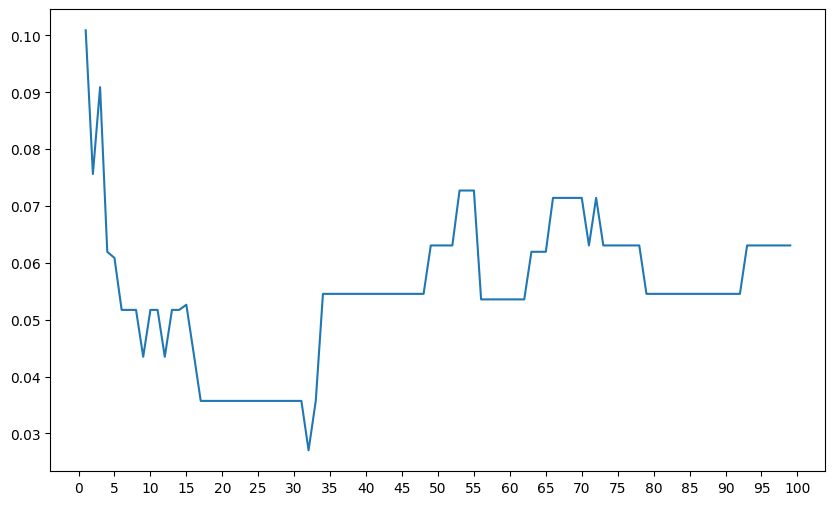

In [28]:
plt.plot(range(1,100), error_rates)
plt.xticks(range(0, 101, 5))
plt.show();

# GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
model = AdaBoostClassifier(random_state=42)

In [31]:
# model?

In [32]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"n_estimators":[20, 32, 50, 200, 5000],    # n_estimator icin cok degisik degerler vermeliyiz
              "learning_rate": [0.01, 0.1, 0.25, 0.4, 0.5, 1.0]}

In [33]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=10,
                          n_jobs = -1)

In [34]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.4, 0.5, 1.0],
                         'n_estimators': [20, 32, 50, 200, 5000]},
             scoring='f1')

In [35]:
grid_model.best_params_

{'learning_rate': 0.01, 'n_estimators': 5000}

In [36]:
grid_model.best_score_

0.9682026023383286

In [37]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 15 429]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [38]:
model = AdaBoostClassifier(n_estimators=200, learning_rate= 0.25, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.967778
test_precision    0.975643
test_recall       0.959394
test_f1           0.967004
dtype: float64

#### 2.Gridsearch

In [39]:
model=AdaBoostClassifier(random_state = 42)

param_grid={"n_estimators": [20, 30, 100, 200], "learning_rate":[0.01, 0.1, 0.2, 0.5, 1.0]}

ada_grid_model = GridSearchCV(model, param_grid, cv = 5, scoring = "f1")

ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 100, 200]},
             scoring='f1')

In [40]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [41]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

ada_importance
Male                                0.00
Area Income                         0.21
Age                                 0.22
Daily Time Spent on Site            0.28
Daily Internet Usage                0.29

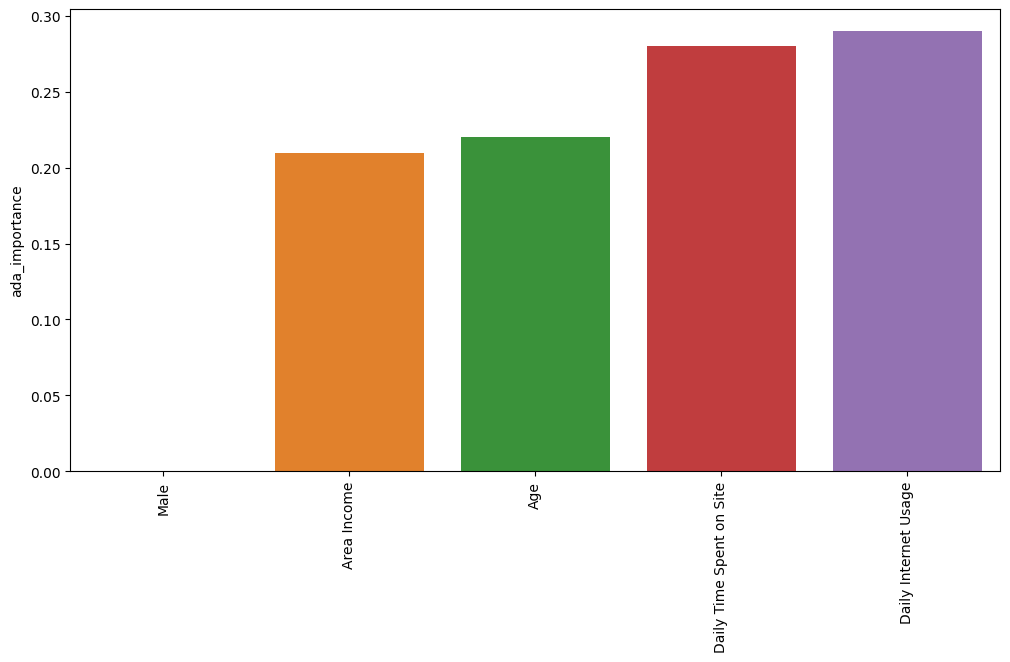

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')
plt.xticks(rotation=90);

In [43]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

# Gradient Boosting Modelling and Model Performance

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

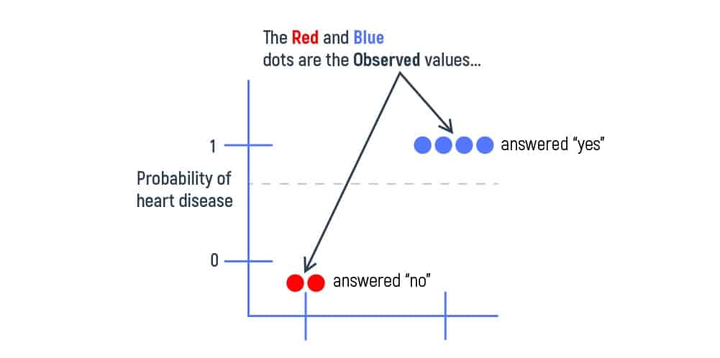

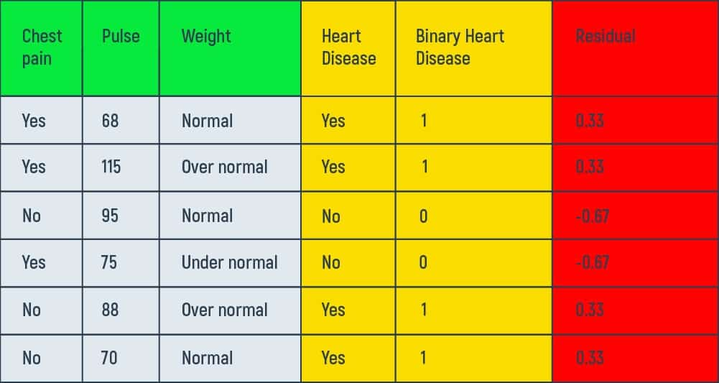

Residual = Gerçek değer - Tahmin edilen olasılık

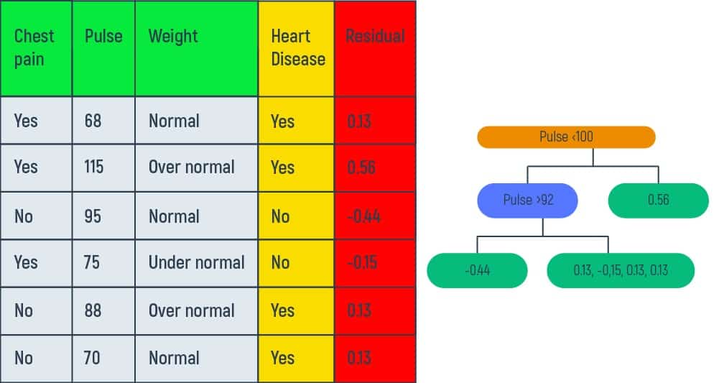

## İlk Weak Learner (İlk Ağaç)

In [44]:
np.log(4/2) #1 olma olasılığı

0.6931471805599453

In [45]:
tah_ol=(np.e**np.log(4/2)) /(1+np.e**np.log(4/2))
tah_ol

0.6666666666666666

**Residual = Gerçek değer - Tahmin edilen olasılık**

In [46]:
1-tah_ol # 1 olma olasılığındaki residual

0.33333333333333337

In [47]:
0-tah_ol # 0 olma olasılığındaki residual

-0.6666666666666666

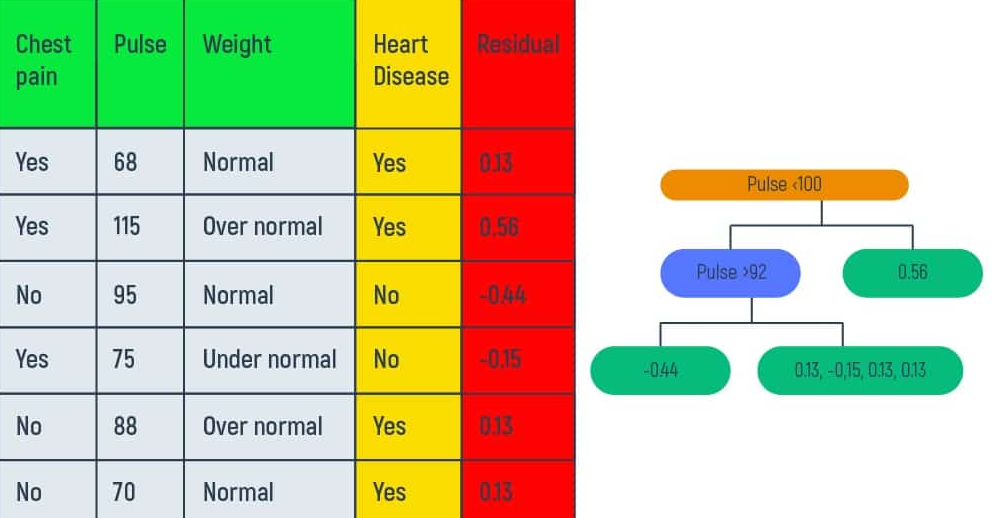

In [48]:
tah_ol + (0.1*0.33) + (0.1*0.13) # ikinci weaklearner 1. Gözlem için 

0.7126666666666667

In [49]:
tah_ol + (0.1*-0.67) + (0.1*-0.44) # ikinci weaklearner 3. Gözlem için

0.5556666666666665

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
grad_model = GradientBoostingClassifier(random_state = 42)

In [52]:
# grad_model?     

# subsample 1 demek bütün datayi kullan demek, 0.5 ve 0.8 illaki verilir grid de
# max_depth = 3 ama 1 ve 2 yi denemek iyidir

In [53]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [55]:
scores = cross_validate(grad_model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.952222
test_precision    0.958870
test_recall       0.945960
test_f1           0.951603
dtype: float64

In [56]:
param_grid = {"n_estimators":[30, 50, 100], 
              "subsample" : [0.3, 0.5],
              "max_features" : [None, 1, 2, 4],
              "learning_rate": [0.07, 0.1, 0.15]}

In [57]:
grid_grad_model = GridSearchCV(estimator=grad_model,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=10,
                          n_jobs = -1)

In [58]:
grid_grad_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.15],
                         'max_features': [None, 1, 2, 4],
                         'n_estimators': [30, 50, 100],
                         'subsample': [0.3, 0.5]},
             scoring='f1')

In [59]:
grid_grad_model.best_params_

{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 0.5}

In [60]:
grid_grad_model.best_score_

0.9702876584331165

In [61]:
eval_metric(grid_grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[451   5]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [62]:
scores = cross_validate(grid_grad_model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.962222
test_precision    0.969875
test_recall       0.954949
test_f1           0.961596
dtype: float64

In [63]:
y_pred = grid_grad_model.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)
eval_metric(grid_grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[451   5]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [64]:
model = GradientBoostingClassifier(max_features= 1, learning_rate=1, n_estimators = 50, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

grad_importance
Male                             0.012037
Age                              0.105775
Area Income                      0.141037
Daily Time Spent on Site         0.160880
Daily Internet Usage             0.580272

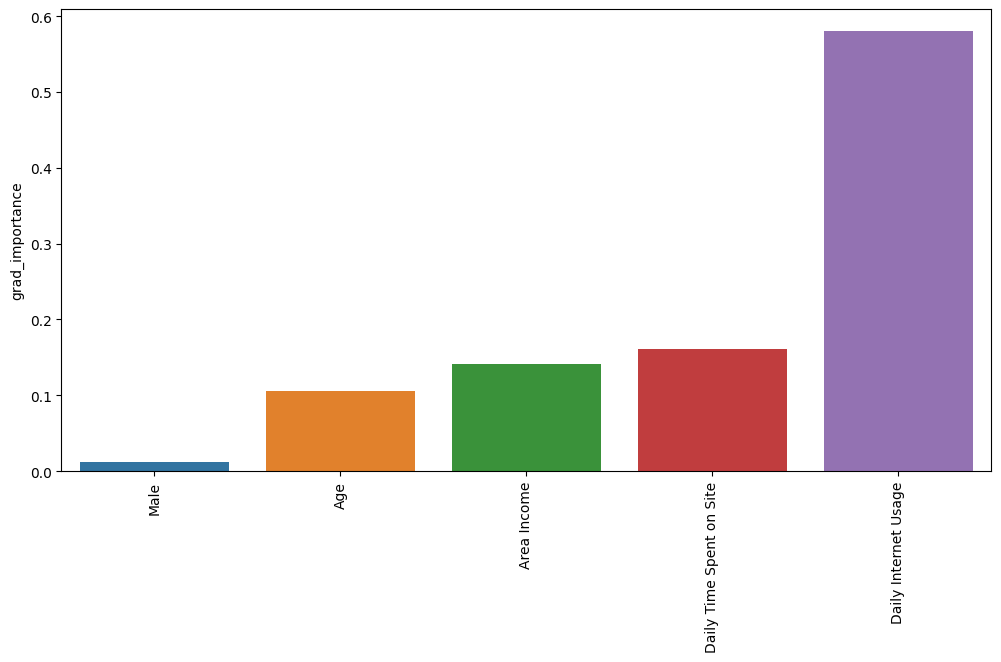

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')
plt.xticks(rotation=90)
plt.show();

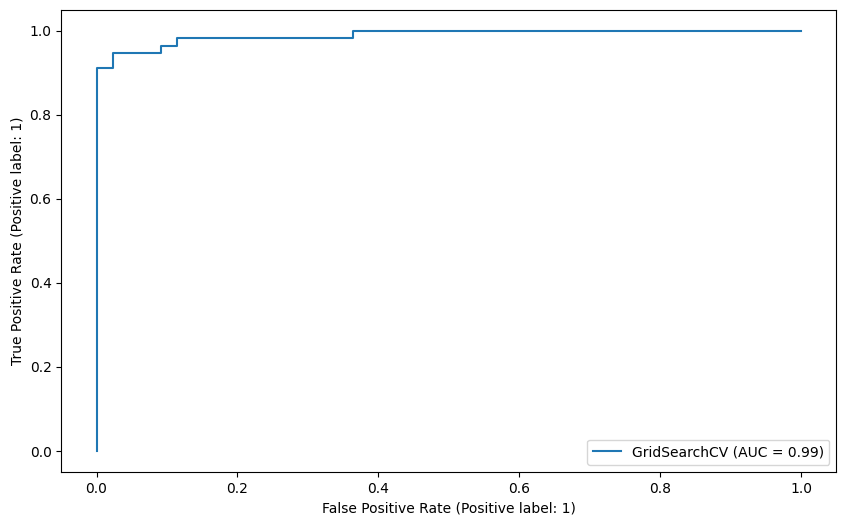

In [66]:
plot_roc_curve(grid_grad_model, X_test, y_test)
plt.show();

# XG Boosting Modelling and Model Performance

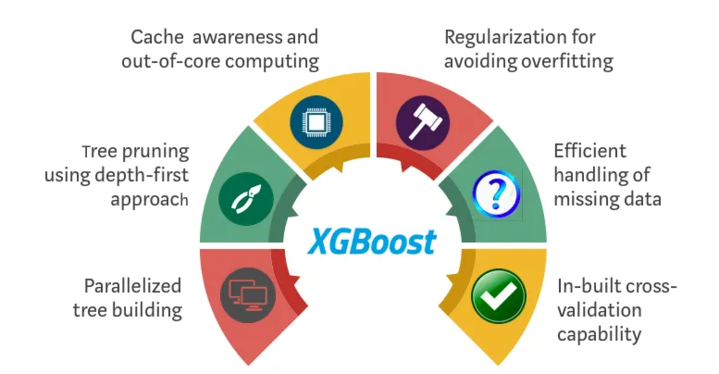

In [67]:
# pip install xgboost

In [68]:
from xgboost import XGBClassifier

In [69]:
# XGBClassifier?

In [70]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [71]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [72]:
scores = cross_validate(xgb, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.957778
test_precision    0.967132
test_recall       0.948081
test_f1           0.956791
dtype: float64

In [73]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [74]:
xgb_model = XGBClassifier(random_state=42)

In [75]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [76]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [77]:
xgb_grid.best_score_

0.9681522711602997

In [78]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[453   3]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Feature Importances

In [79]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

xgb_importance
Male                            0.027042
Age                             0.083713
Area Income                     0.104799
Daily Time Spent on Site        0.197116
Daily Internet Usage            0.587329

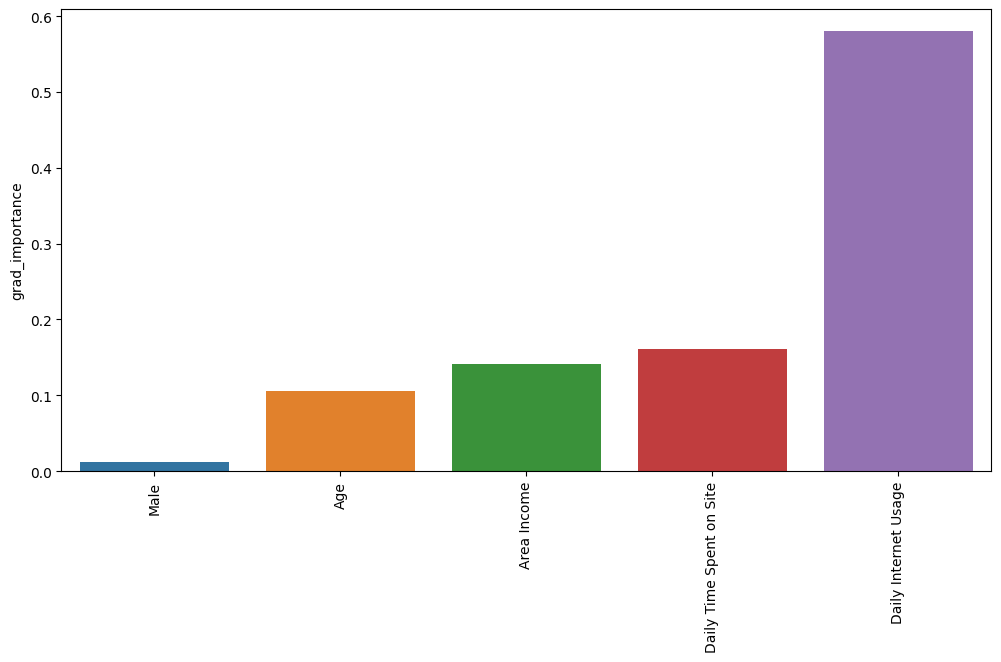

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

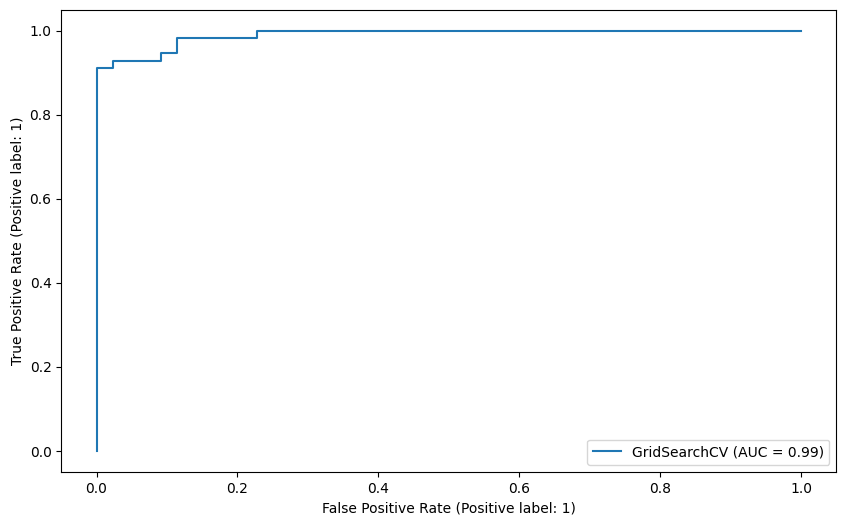

In [81]:
plot_roc_curve(xgb_grid, X_test, y_test);

# Light GBM

https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst

9K 10K veriler geldiginde kullanilabilecek bir algoritma

salih hocamdan : LightGBM’de aşırı öğrenmeyi engellemek için learning_rate, max_dept, num_leaves, min_data_in_leaf parametreleri, öğrenim süresini hızlandırmak için feature_fraction, bagging_fraction ve num_iteration parametreleri optimize edilebilir.

In [82]:
# pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 3.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 6.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.2/1.3 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


GBM = Desicion Tree + Boosting + Gradient Descent

LightGBM = GBM + GOSS + EFB

In [83]:
from lightgbm import LGBMClassifier

In [85]:
#LGBMClassifier?

In [84]:
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)

Exception in thread Thread-9 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1499, in _readerthread
    buffer.append(fh.read())
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [86]:
eval_metric(lgbm_model, X_train, y_train, X_test, y_test)

Test_Set
[[42  2]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        44
           1       0.96      0.93      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [87]:
# LightGBM modelini oluşturun
model = LGBMClassifier(random_state=42)

# Çapraz doğrulama yapın
scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'], cv=10)

# Skorları DataFrame'e dönüştürün ve ortalamalarını alın
df_scores = pd.DataFrame(scores, index=range(1, 11))
mean_scores = df_scores.mean()[2:]
print(mean_scores)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 399, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492593 -> initscore=-0.029632
[LightGBM] [Info] Start training from score -0.029632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 410
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 810, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493827 -> initscore=-0.024693
[LightGBM] [Info] Start training from score -0.024693
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [94]:
param_grid = {
    'learning_rate': [0.01,0.05, 0.1],
    'n_estimators': [32, 40, 50],
    'num_leaves': [10, 15, 20],
    'max_depth': [-1, 2, 3, 5],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.5, 0.7, 0.8]
}

In [95]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_grid = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, 
                         scoring='f1', n_jobs=-1).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668


In [96]:
lgbm_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'num_leaves': 10,
 'subsample': 0.5}

In [97]:
lgbm_grid.best_score_

0.9626782737923515

In [98]:
eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[455   1]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [99]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[455   1]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



Feature Importance

In [100]:
model = LGBMClassifier(random_state=42, colsample_bytree = 0.7, subsample= 0.5, 
                       learning_rate=0.1, max_depth=5, n_estimators=50)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

xgb_importance
Male                                   6
Age                                  133
Area Income                          178
Daily Internet Usage                 186
Daily Time Spent on Site             198

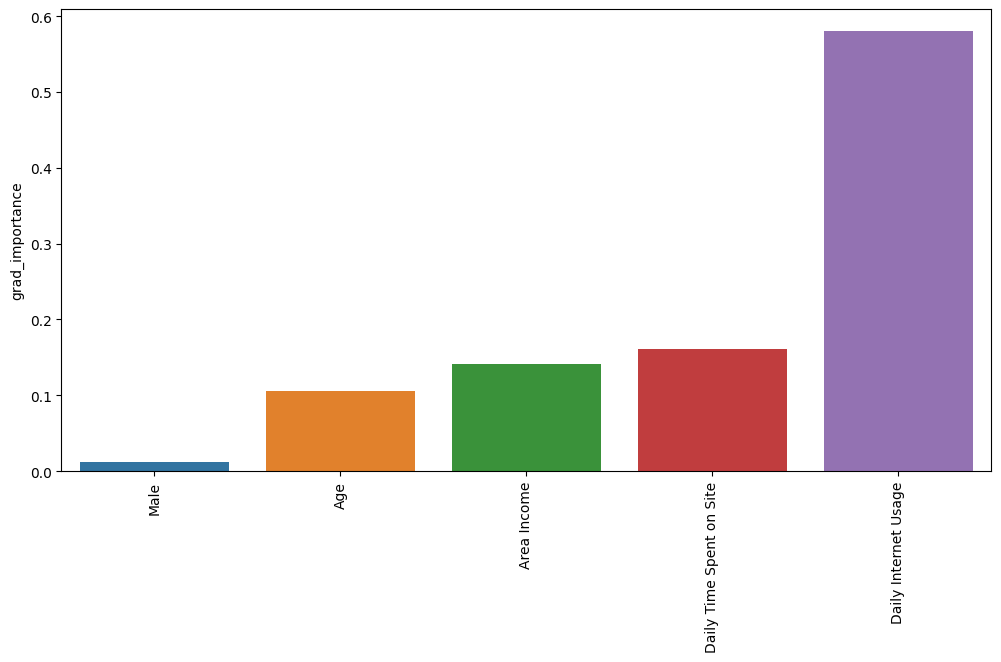

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

roc_curve

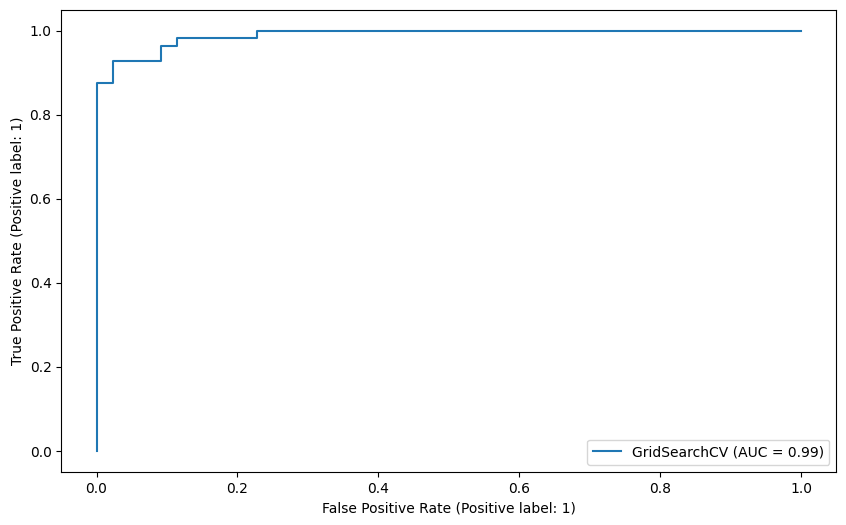

In [102]:
plot_roc_curve(lgbm_grid, X_test, y_test);

# Model kiyaslama

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)


from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)


from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


Train_Set
[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Test_Set
[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91     

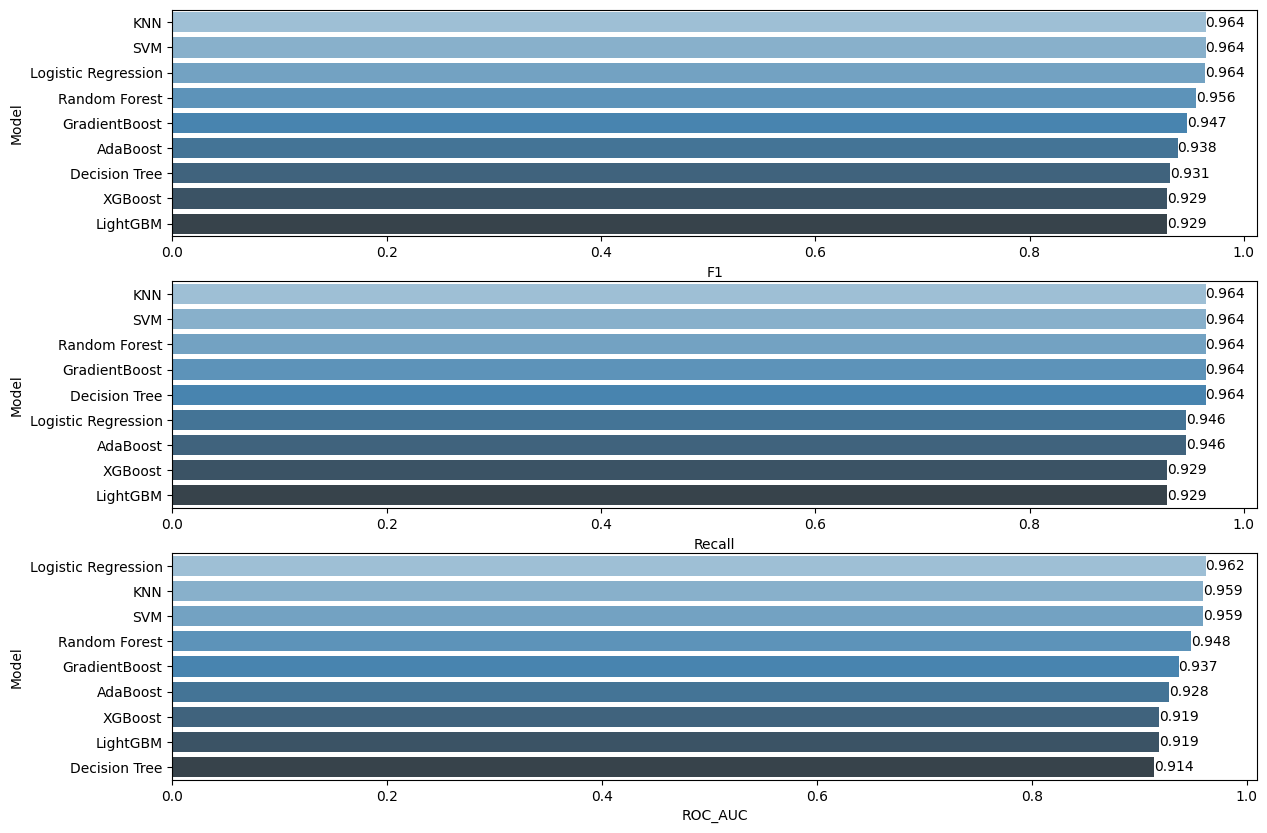

In [106]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost", "LightGBM"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall, lgbm_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc, lgbm_auc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Lazy Predickt Library

https://medium.com/machine-learning-t%C3%BCrkiye/lazy-predict-library-c90b5ab04f1d

In [108]:
# pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [109]:
from lazypredict.Supervised import LazyClassifier

In [110]:
# LazyClassifier?     # top 5 are adviced!

In [111]:
# LazyClassifier'ı oluşturmak
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Modeli eğitmek
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Sonuçları yazdırmak
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 34.91it/s]

[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 